In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

C:\Users\Dinnu\AppData\Local\Temp\ipykernel_26760\2695430638.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df_train = pd.read_csv('Classification_train.csv')
df_test = pd.read_csv('Classification_test.csv')

In [3]:
df_train  ## 8909 rows x 19 columns
# df_test  ## 1572 rows x 18 columns 

,Unnamed: 0,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0,0.00,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
1,1,0,0.00,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
2,2,0,0.00,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
3,3,0,0.00,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
4,4,0,0.00,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.4,Feb,2,4,3,3,Returning_Visitor,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8904,8904,2,64.75,0,0.0,44,1157.976190,0.000000,0.013953,0.0,0.0,Nov,2,2,1,10,Returning_Visitor,False,False
8905,8905,0,0.00,1,0.0,16,503.000000,0.000000,0.037647,0.0,0.0,Nov,2,2,1,1,Returning_Visitor,False,False
8906,8906,0,0.00,0,0.0,5,465.750000,0.000000,0.021333,0.0,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
8907,8907,0,0.00,0,0.0,6,184.250000,0.083333,0.086667,0.0,0.0,Nov,3,2,1,13,Returning_Visitor,True,False


In [4]:
df_train.drop('Unnamed: 0', axis = 1, inplace = True)
df_test.drop('Unnamed: 0', axis = 1, inplace = True)

In [6]:
#df_train.info()
#df_test.info()

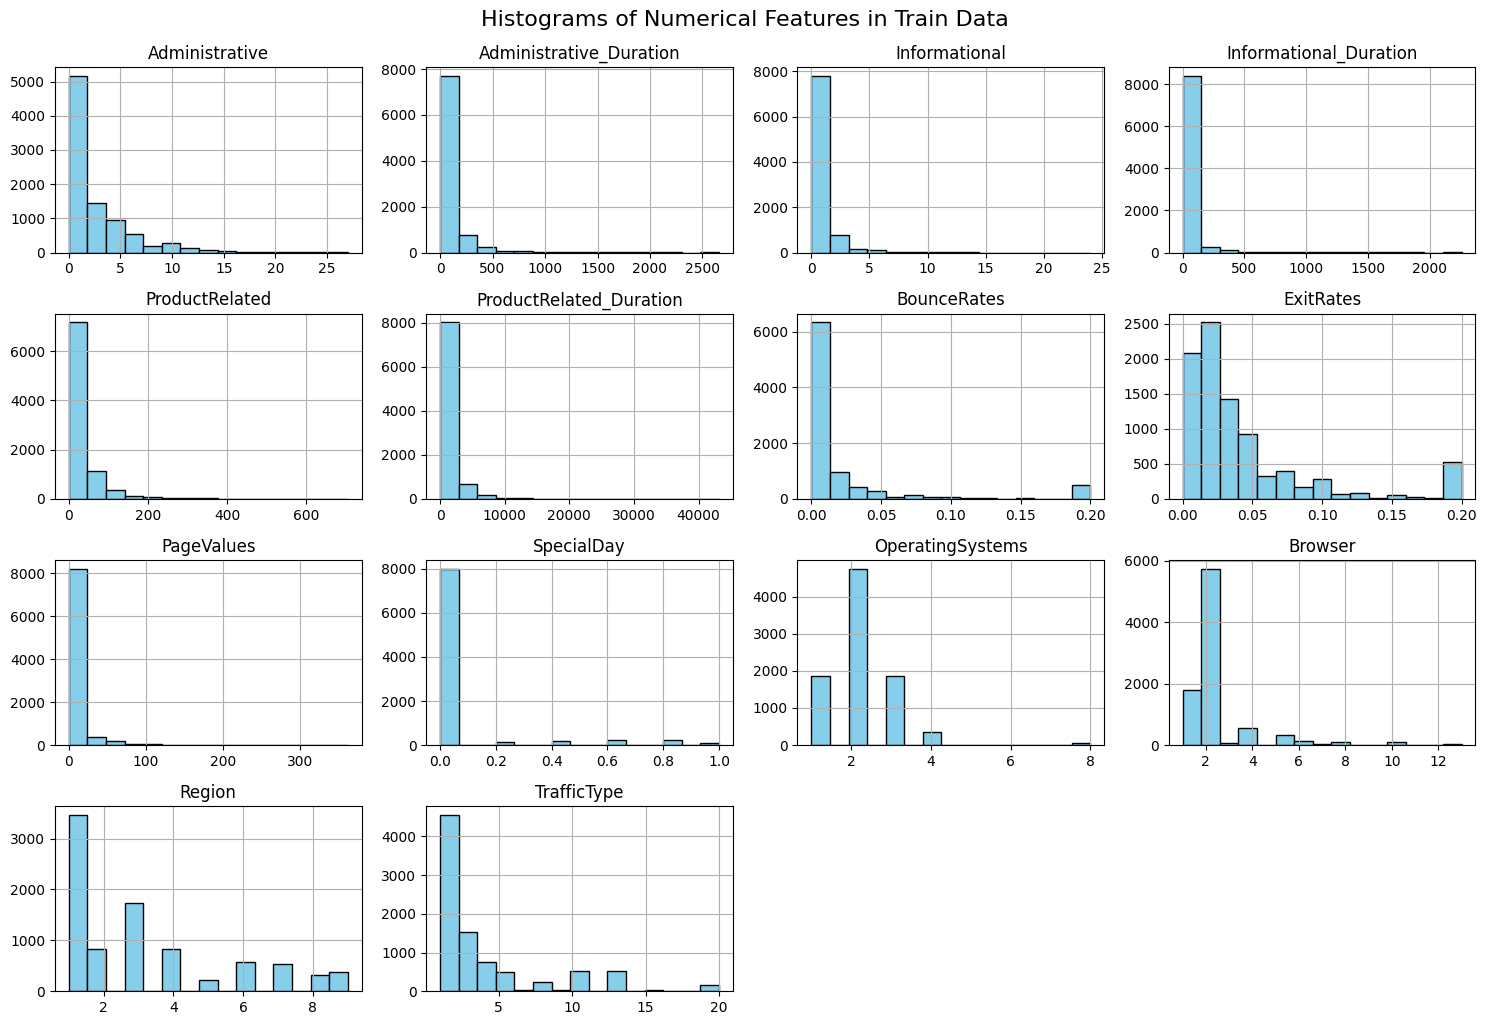

In [5]:
## Now, We wanna understand what kind of data we have at the moment - and to understand what scaling we'll decide on later

def plot_histograms(data, title):
    data.hist(bins=15, figsize=(15, 10), layout=(4,4), color='skyblue', edgecolor='black')
    plt.tight_layout()
    plt.suptitle(title, fontsize=16, y=1.02)
    plt.show()


plot_histograms(df_train.select_dtypes(include=['int64', 'float64']), 'Histograms of Numerical Features in Train Data')

Write down the details about the dataset!! 

# DATA PREPARATION

In [6]:
# We're gonna map our Month column with values between 0 to 9 -- condiserding the order factor   

df_train['Month'].unique()
df_train['Month'] = df_train['Month'].map({'Feb': 0, 'Mar': 1, 'May': 2, 'June': 3, 'Jul': 4, 'Aug': 5, 'Sep': 6, 'Oct': 7, 'Nov': 8, 'Dec': 9 })

In [7]:
#df_test['Month'].unique()
df_test['Month'] = df_test['Month'].map({'Feb': 0, 'Mar': 1, 'May': 2, 'June': 3, 'Jul': 4, 'Aug': 5, 'Sep': 6, 'Oct': 7, 'Nov': 8, 'Dec': 9 })

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8909 entries, 0 to 8908
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           8909 non-null   int64  
 1   Administrative_Duration  8909 non-null   float64
 2   Informational            8909 non-null   int64  
 3   Informational_Duration   8909 non-null   float64
 4   ProductRelated           8909 non-null   int64  
 5   ProductRelated_Duration  8909 non-null   float64
 6   BounceRates              8909 non-null   float64
 7   ExitRates                8909 non-null   float64
 8   PageValues               8909 non-null   float64
 9   SpecialDay               8909 non-null   float64
 10  Month                    8909 non-null   int64  
 11  OperatingSystems         8909 non-null   int64  
 12  Browser                  8909 non-null   int64  
 13  Region                   8909 non-null   int64  
 14  TrafficType             

In [9]:

df_train_encoded = pd.get_dummies(df_train, columns=['VisitorType'])
df_test_encoded = pd.get_dummies(df_test, columns=['VisitorType'])

In [10]:
#Prepared data set 

df_train_encoded.info()
df_test_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8909 entries, 0 to 8908
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Administrative                 8909 non-null   int64  
 1   Administrative_Duration        8909 non-null   float64
 2   Informational                  8909 non-null   int64  
 3   Informational_Duration         8909 non-null   float64
 4   ProductRelated                 8909 non-null   int64  
 5   ProductRelated_Duration        8909 non-null   float64
 6   BounceRates                    8909 non-null   float64
 7   ExitRates                      8909 non-null   float64
 8   PageValues                     8909 non-null   float64
 9   SpecialDay                     8909 non-null   float64
 10  Month                          8909 non-null   int64  
 11  OperatingSystems               8909 non-null   int64  
 12  Browser                        8909 non-null   i

In [11]:
# Converting all Bool to ints >> true = 1 and False = 0 >> TRAINING DATASET

for column in df_train_encoded.columns:
    if df_train_encoded[column].dtype == 'bool':
        df_train_encoded[column] = df_train_encoded[column].astype(int)

In [12]:
# Converting all Bool to ints >> true = 1 and False = 0 >> TEST DATASET

for column in df_test_encoded.columns:
    if df_test_encoded[column].dtype == 'bool':
        df_test_encoded[column] = df_test_encoded[column].astype(int)

In [13]:
df_train_encoded.info()
df_test_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8909 entries, 0 to 8908
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Administrative                 8909 non-null   int64  
 1   Administrative_Duration        8909 non-null   float64
 2   Informational                  8909 non-null   int64  
 3   Informational_Duration         8909 non-null   float64
 4   ProductRelated                 8909 non-null   int64  
 5   ProductRelated_Duration        8909 non-null   float64
 6   BounceRates                    8909 non-null   float64
 7   ExitRates                      8909 non-null   float64
 8   PageValues                     8909 non-null   float64
 9   SpecialDay                     8909 non-null   float64
 10  Month                          8909 non-null   int64  
 11  OperatingSystems               8909 non-null   int64  
 12  Browser                        8909 non-null   i

 Now we know our dataset is fully numeric - so it's time to split our dataset to predictors and response variables : SPLITTING OUR DATASET

The most important factor here is, the test data does not have the desired response variable! 
Hence, when it comes to splitting our dataset - we only split the train data and compare the whole data set with the test data

We beleive, in this case, our test data behaves as the predictor data post building our model and hence we decided to move ahead with this plan.

In [14]:
X_data = df_train_encoded.drop('Revenue', axis=1)
Y_data = df_train_encoded['Revenue']

In [15]:
#X_data.info()
#Y_data.info()

# DATA SCALING : with MinMax Scaler 

In [16]:
scaler = MinMaxScaler()

X_data_scaled = scaler.fit_transform(X_data)

Considering the features are not normally distributed we are proceeeding with MinMax Scaler 

# Clustering

In [17]:
## Cluster type1 - Hierarchial Clustering using Agglomerative Clustering where the clustering is based of the linkage!

from sklearn.cluster import AgglomerativeClustering

# Assuming the model parameters as below:
# n_clusters: The number of clusters to find >> Hence giving none 
# linkage:defualt = 'ward' >> from the same reasons we decided to go with ward in regression.
# distance_threshold:   >> we decieded to go with a range of 1 to 50 >> to get no of clusters = 4
# the best suited threshold distance for the same is 35

AgglClust_Model = AgglomerativeClustering(distance_threshold = 35, n_clusters = None, 
                                linkage = 'ward')

# Train the model
AgglClust_Model = AgglClust_Model.fit(X_data_scaled)

# The number of clusters found by the algorithm for a threshold :
print("Number of clusters : ",AgglClust_Model.n_clusters_)

# Cluster labels for each point.
print("Cluster labels : ",AgglClust_Model.labels_)


Number of clusters :  4
Cluster labels :  [0 0 2 ... 2 2 0]


Plotting the Dendogram

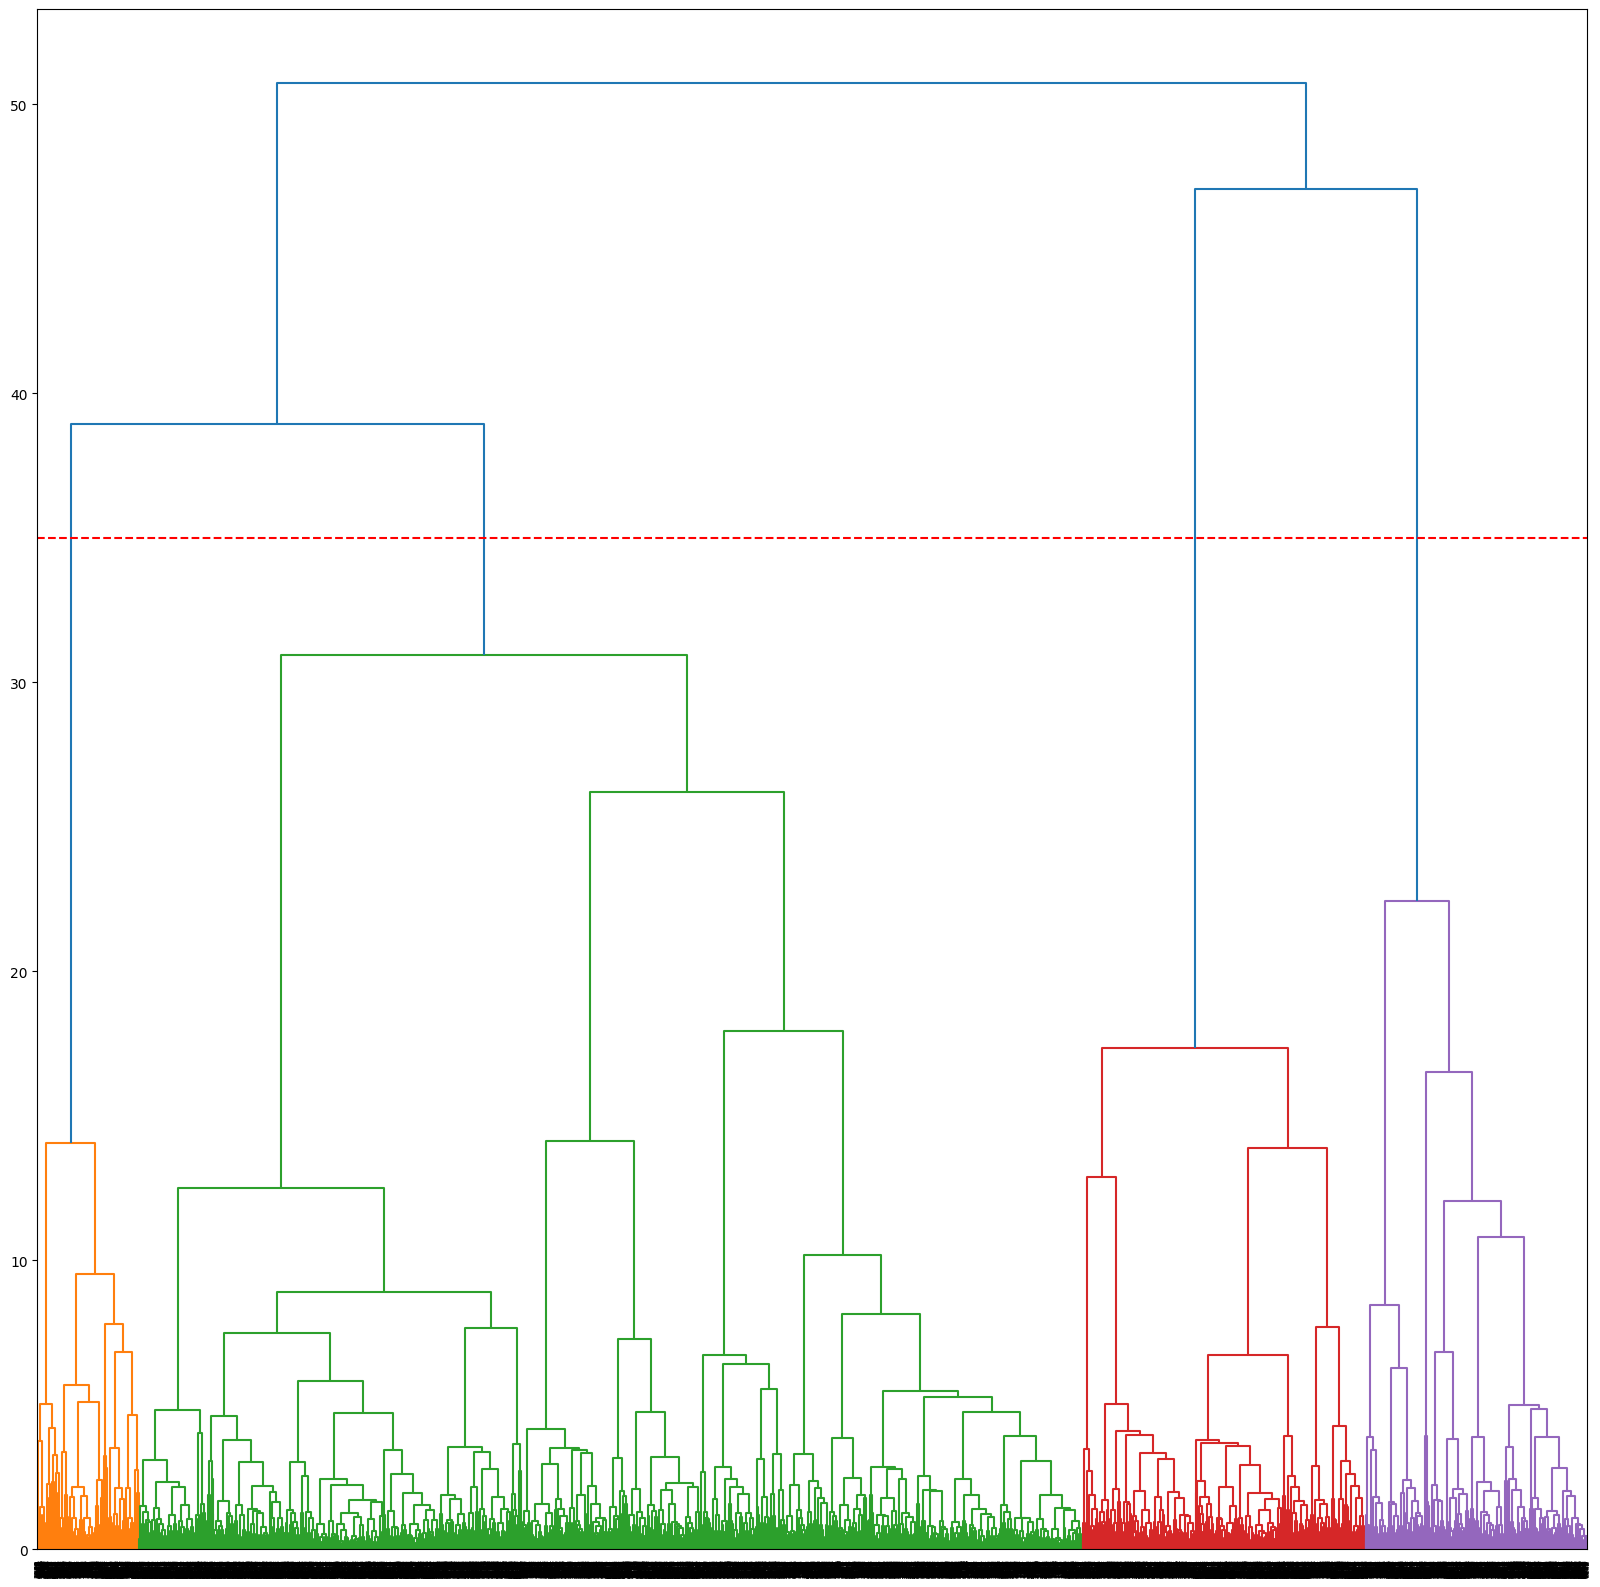

In [33]:
# Dendrograpm
from scipy.cluster.hierarchy import dendrogram, linkage

plt.subplots(figsize = (20,20))
dendrogram(linkage(X_data_scaled, method = 'ward'))
plt.axhline(y = 35, c = 'r', linestyle = '--')

plt.show()

Inference:
 
The Dendogram above shows the no of clusters which can be formed which is 4. 
* No of Clusters = 4
* Distance threshold = 35
* Above plot gives a pictorial representation of the same and the height difference between joining the clusters is the dis-similarities in the dataset.

In [18]:
# To get a value count we're gonna use collections
import collections, numpy

# To get the size of each cluster 
values = collections.Counter(AgglClust_Model.labels_)
print(values)

Counter({0: 5461, 2: 1623, 1: 1271, 3: 554})


In [19]:
# Now, inversing our scaled data back to it's original form so it's easier for analysis:
X_data_inversed = scaler.inverse_transform(X_data_scaled)
df_X_data_inversed = pd.DataFrame(X_data_inversed, columns = X_data.columns)

# Add a new colum tp our dataset
df_X_data_inversed['Aggl_Cluster'] = AgglClust_Model.labels_
df_X_data_inversed.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,Weekend,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Aggl_Cluster
0,0.0,0.0,0.0,0.0,2.0,64.000000,0.000000,0.100000,0.0,0.0,0.0,2.0,2.0,1.0,2.0,0.0,0.0,0.0,1.0,0
1,0.0,0.0,0.0,0.0,2.0,2.666667,0.050000,0.140000,0.0,0.0,0.0,3.0,2.0,2.0,4.0,0.0,0.0,0.0,1.0,0
2,0.0,0.0,0.0,0.0,10.0,627.500000,0.020000,0.050000,0.0,0.0,0.0,3.0,3.0,1.0,4.0,1.0,0.0,0.0,1.0,2
3,0.0,0.0,0.0,0.0,19.0,154.216667,0.015789,0.024561,0.0,0.0,0.0,2.0,2.0,1.0,3.0,0.0,0.0,0.0,1.0,0
4,0.0,0.0,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.0,0.4,0.0,2.0,4.0,3.0,3.0,0.0,0.0,0.0,1.0,3


# Analaysing our dataset from Agglomerative Clustering

In [20]:
## Websites within the e-comerce platform   

#  Administrative Websites :  -- Pages visited
Admin_Frq_count = df_X_data_inversed.groupby('Aggl_Cluster')['Administrative'].count().sort_values()
print(Admin_Frq_count)

#  Administrative Websites :  -- time spent 
Admin_Duration_Average = df_X_data_inversed.groupby('Aggl_Cluster')['Administrative_Duration'].mean().sort_values()
print(Admin_Duration_Average)

Aggl_Cluster
3     554
1    1271
2    1623
0    5461
Name: Administrative, dtype: int64
Aggl_Cluster
3     1.892840
0    83.026898
1    89.892528
2    91.004545
Name: Administrative_Duration, dtype: float64


Administrative Websites analysis:  - based on the pages visited:
  
* Cluster 0 has the most pages opened.
* Cluster 3 has the least pages opened.

Time spent on average:

* Cluster 2 has users who spend the most amount of time in Admin websites on an average.
* Cluster 3 has users who spend least amount of time in Admin websites on an average.

In [21]:
#  Informative Websites : -- Pages Visted
Informational_Frq_count = df_X_data_inversed.groupby('Aggl_Cluster')['Informational'].count().sort_values()
print(Informational_Frq_count)

#  Informative Websites :  -- time spent 
Informational_Duration_Average = df_X_data_inversed.groupby('Aggl_Cluster')['Informational_Duration'].mean().sort_values()
print(Informational_Duration_Average)

Aggl_Cluster
3     554
1    1271
2    1623
0    5461
Name: Informational, dtype: int64
Aggl_Cluster
3     0.077617
1    19.953324
0    35.890329
2    46.592840
Name: Informational_Duration, dtype: float64


Information Websites analysis:  - based on the pages visited: 

* Cluster 0 has the most pages opened.
* Cluster 3 has the least pages opened.


Time spent on average

* Cluster 2 has users who spend the most amount of time in Info websites on an average.
* Cluster 3 has users who spend least amount of time in Info websites on an average.

In [22]:
# ProductRelated Websites : -- Pages Visted
ProductRelated_Frq_count = df_X_data_inversed.groupby('Aggl_Cluster')['ProductRelated'].count().sort_values()
print(ProductRelated_Frq_count)

# ProductRelated Websites :  -- time spent 
ProductRelated_Duration_Average = df_X_data_inversed.groupby('Aggl_Cluster')['ProductRelated_Duration'].mean().sort_values()
print(ProductRelated_Duration_Average)

Aggl_Cluster
3     554
1    1271
2    1623
0    5461
Name: ProductRelated, dtype: int64
Aggl_Cluster
3      28.974318
1     640.195408
0    1367.954743
2    1437.125336
Name: ProductRelated_Duration, dtype: float64


ProductRelated Websites analysis:  - based on the pages visited 

* Cluster 0 has the most pages opened.
* Cluster 3 has the least pages opened.


Time spent on average
* Cluster 2 has users who spend the most amount of time in ProductRelated websites on an average.
* Cluster 3 has users who spend least amount of time in ProductRelated websites on an average.

In [23]:
# Column Name : Special Day
pd.crosstab(df_X_data_inversed['Aggl_Cluster'], df_X_data_inversed['SpecialDay'])

SpecialDay,0.0,0.2,0.4,0.6,0.8,1.0
Aggl_Cluster,,,,,,
0,4777,118,145,216,205,0
1,1225,6,9,18,7,6
2,1528,0,0,0,2,93
3,483,13,19,14,18,7


Special Day Analysis:

* Cluster 0 : max_count = 4777 >> SpecialDay = 0.0 ; least_count = 0 >> SpecialDay = 1.0
* Cluster 1 : max_count = 1225 >> SpecialDay = 0.0 ; least_count = 6 >> SpecialDay = 0.2 & 0.1
* Cluster 2 : max_count = 1528 >> SpecialDay = 0.0 ; least_count = 0 >> SpecialDay = 0.2 && 0.4 && 0.6
 * Cluster 3 : max_count = 483 >> SpecialDay = 0.0 ; least_count = 7 >> SpecialDay = 1.0

Overall, the max number of users who generate the revenue based of Special Days are classified as 0.

In [24]:
# Column Name : Operating Systems 
pd.crosstab(df_X_data_inversed['Aggl_Cluster'], df_X_data_inversed['OperatingSystems'])

OperatingSystems,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0
Aggl_Cluster,,,,,,,,
0,995,3145,1038,229,4,6,1,43
1,308,697,208,48,0,2,0,8
2,410,687,443,73,1,3,1,5
3,148,221,168,11,0,3,0,3


 Operating Systems Analysis:

* Cluster 0 : max_count= 3145 >> OS = 2.0 ; least_count = 1 >> OS = 7.0
* Cluster 1 : max_count = 697 >> OS = 2.0 ; least_count = 0 >> OS = 5.0 && 7.0
* Cluster 2 : max_count = 687 >> OS = 2.0 ; least_count = 1 >> OS = 5.0 && 7.0
* Cluster 3 : max_count = 221 >> OS = 2.0 ; least_count = 0 >> OS = 5.0 and 7.0

Overall, Max number of users seem to be using the OS classified in 2.0 while using this platform and OS 7.0 seem to have less users. 
This could mean a version upgrade is required.

In [25]:
# Column Name : Browser 
pd.crosstab(df_X_data_inversed['Aggl_Cluster'], df_X_data_inversed['Browser'])

Browser,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,10.0,11.0,12.0,13.0
Aggl_Cluster,,,,,,,,,,,,
0,964,3613,30,361,217,98,19,41,69,4,4,41
1,278,782,15,95,48,10,5,20,16,0,1,1
2,400,1011,18,60,57,19,8,26,23,1,0,0
3,137,337,10,24,19,7,4,10,4,0,0,2


Browser Analysis:

* Cluster 0 : max_count= 3613 >> Browser = 2.0 ; least_count = 4 >> Browser = 11.0 & 12.0
* Cluster 1 : max_count = 782 >> Browser = 2.0 ; least_count = 0 >> Browser = 11.0
* Cluster 2 : max_count = 1011 >> Browser = 2.0 ; least_count = 0 >> Browser = 12.0 & 13.0
* Cluster 3 : max_count = 337 >> Browser = 2.0 ; least_count = 0 >> Browser = 11.0 & 12.0

Overall, Max number of users seem to be using the Browser classified in 2.0 while using this platform and Browser 11.0 & 12.0 & 13.0 seem to have less users. This could mean a version upgrade is required!

In [26]:
# Column Name : Region 
pd.crosstab(df_X_data_inversed['Aggl_Cluster'], df_X_data_inversed['Region'])

Region,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0
Aggl_Cluster,,,,,,,,,
0,2179,512,1060,495,136,334,335,189,221
1,484,115,229,104,32,98,72,57,80
2,608,161,332,178,39,103,94,53,55
3,194,51,109,61,11,43,42,17,26


Region Analysis:

* Cluster 0 : max_count= 2179 >> Region = 1.0 ; least_count = 136 >> Region = 5.0
* Cluster 1 : max_count = 484 >> Region = 1.0 ; least_count = 32 >> Region = 5.0
* Cluster 2 : max_count = 608 >> Region = 1.0 ; least_count = 39 >> Region = 5.0
* Cluster 3 : max_count = 194 >> Region = 1.0 ; least_count = 11 >> Region = 5.0

Overall, Max number of users seem to be in the Region classified in 1.0  and users in 5.0 seem to have less users.

In [27]:
# Column Name : Traffic Type  
pd.crosstab(df_X_data_inversed['Aggl_Cluster'], df_X_data_inversed['TrafficType'])

TrafficType,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0
Aggl_Cluster,,,,,,,,,,,,,,,,,,,
0,1222,1527,1033,487,63,203,15,82,2,231,74,388,5,9,0,0,4,9,107
1,33,683,103,77,107,40,5,134,6,19,43,4,0,1,1,0,1,0,14
2,349,516,232,163,18,56,10,31,20,70,59,63,1,13,0,1,2,1,18
3,174,48,149,29,4,15,0,3,3,18,15,79,0,6,0,0,1,1,9


Traffic Type Analysis:

* Cluster 0 : max_count = 1527 >> Traffic_Type = 2.0 ; least_count = 0 >> Traffic_Type = 17.0 & 16.0
* Cluster 1 : max_count =  683 >> Traffic_Type = 2.0 ; least_count = 0 >> Traffic_Type = 17.0 & 14.0
* Cluster 2 : max_count =  516 >> Traffic_Type = 2.0 ; least_count = 0 >> Traffic_Type = 16.0
* Cluster 3 : max_count =  174 >> Traffic_Type = 1.0 ; least_count = 0 >> Traffic_Type = 7.0 & 14.0 & 16.0 & 17.0

Overall, most frequency of Traffic type seem to be classified in 2.0. 

In [30]:
# Column Name : VisitorType

other_Frq_count = df_X_data_inversed.groupby('Aggl_Cluster')['VisitorType_Other'].count().sort_values()
print(other_Frq_count)

Aggl_Cluster
3     554
1    1271
2    1623
0    5461
Name: VisitorType_Other, dtype: int64


* Cluster 0 has most no of visitor type = OTHER.
* Cluster 3 has least no of visitor type = OTHER.

In [29]:
# Column Name : VisitorType

new_Frq_count = df_X_data_inversed.groupby('Aggl_Cluster')['VisitorType_New_Visitor'].count().sort_values()
print(Visttype_Frq_count)

Aggl_Cluster
3     554
1    1271
2    1623
0    5461
Name: VisitorType_Other, dtype: int64


* Cluster 0 has most no of visitor type = NEW.
* Cluster 3 has least no of visitor type = NEW.

In [31]:
# Column Name : VisitorType

return_Frq_count = df_X_data_inversed.groupby('Aggl_Cluster')['VisitorType_Returning_Visitor'].count().sort_values()
print(return_Frq_count)

Aggl_Cluster
3     554
1    1271
2    1623
0    5461
Name: VisitorType_Returning_Visitor, dtype: int64


* Cluster 0 has most no of visitor type = RETURNING VISITOR.
* Cluster 3 has least no of visitor type = RETURNING VISITOR.

In [32]:
# Column Name : VisitorType   

# Mapping dictionary:
# Returning_Visitor: 0 
# New_Visitor: 1 
# Other: 2

#pd.crosstab(df_X_data_inversed['Aggl_Cluster'], df_X_data_inversed['VisitorType'])

In [33]:
# Column Name : Month 

# Mapping dictionary:
# Feb: 0, Mar: 1, May: 2, June: 3, Jul: 4 
# Aug: 5, Sep: 6, Oct: 7, Nov: 8, Dec: 9

pd.crosstab(df_X_data_inversed['Aggl_Cluster'], df_X_data_inversed['Month'])

Month,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0
Aggl_Cluster,,,,,,,,,,
0,95,838,1598,134,194,207,191,214,1246,744
1,1,165,241,21,37,56,77,87,322,264
2,12,269,413,30,59,49,49,81,467,194
3,29,106,172,23,23,15,6,6,99,75


Month Analysis:

* Cluster 0 : max_count = 1598 >> Month = 2.0 ; least_count = 95 >> Month = 0.0
* Cluster 1 : max_count =  322 >> Month = 8.0 ; least_count = 1 >> Month = 0.0
* Cluster 2 : max_count =  467 >> Month = 8.0 ; least_count =  12 >> Month = 0.0
* Cluster 3 : max_count = 172 >> Month = 2.0 ; least_count =  6 >> Month = 6.0 & 7.0 

Overall, most frequency of Months impacting the revenue seem to be classified among 2.0 and 8.0. i.e., May and November Months

In [34]:
# Column Name : Bounce Rates

Bounce_Duration_Average = df_X_data_inversed.groupby('Aggl_Cluster')['BounceRates'].mean().sort_values()
print(Bounce_Duration_Average)

Aggl_Cluster
1    0.006781
2    0.009712
0    0.012750
3    0.186913
Name: BounceRates, dtype: float64


Bouncing Rates Analysis in my e-commerce platform:

* Cluster 3 has the most users who bounce away form the pages and leave the website for reasons varied based of the user preferance.
* Cluster 1 has the least users who bounce away from the pages.

In [35]:
# Column Name : Exit Rates

Exit_Duration_Average = df_X_data_inversed.groupby('Aggl_Cluster')['ExitRates'].mean().sort_values()
print(Exit_Duration_Average)

Aggl_Cluster
1    0.022656
2    0.031101
0    0.036663
3    0.190986
Name: ExitRates, dtype: float64


Exit Rates Analysis in my e-commerce platform:

* Cluster 3 has the most users who leave the website
* Cluster 1 has the least users who leave the website

In [37]:
# Column Name : Page Value

PageValues_Duration_Average = df_X_data_inversed.groupby('Aggl_Cluster')['PageValues'].mean().sort_values()
print(PageValues_Duration_Average)

Aggl_Cluster
3     0.000000
0     5.226609
2     6.023209
1    10.169407
Name: PageValues, dtype: float64


Page value analysis - Page value tells which page is contributing to the most revenue.

* Cluster 1 has the highest page value.
* Cluster 3 has the least page value.

---

In [38]:
#########################################################################################################

In [ ]:
## Cluster type2 - Partitioning Clustering using Kmeans Clustering :

from sklearn.cluster import KMeans
#from sklearn.metrics import silhouette_score

In [39]:
#Now, with my optimal no. of cluster value:

kmeansClust_Model = KMeans(n_clusters = 3,  random_state = 42, n_init= 'auto')
# Train the clustering model on the feature set
kmeansClust_Model.fit(X_data_scaled)
# labels_ : Labels of each data point
print(kmeansClust_Model.labels_)
# Coordinates of cluster centers. 
print(kmeansClust_Model.cluster_centers_)

[0 0 2 ... 2 2 1]
[[ 6.63603042e-02  2.37469830e-02  1.59896603e-02  1.12402736e-02
   3.66028683e-02  2.22731391e-02  1.48343000e-01  2.67935910e-01
   1.01491033e-02  1.20118168e-01  2.27835221e-01  1.59442920e-01
   1.14106352e-01  2.61521418e-01  1.57163959e-01  2.08166817e-15
  -9.99200722e-16  3.38271078e-17  1.00000000e+00]
 [ 9.88159404e-02  3.50871070e-02  2.23431716e-02  1.63618280e-02
   5.16209259e-02  3.22482017e-02  8.53935112e-02  1.81280691e-01
   2.10354388e-02  6.19520748e-03  8.29144750e-01  1.62645070e-01
   1.18230080e-01  2.72172706e-01  1.73321234e-01  1.72084569e-15
   2.64465225e-01  1.49035652e-02  7.20631210e-01]
 [ 9.29802305e-02  3.28963553e-02  2.47581668e-02  1.78716663e-02
   4.72828984e-02  2.88016050e-02  9.20214555e-02  1.89906251e-01
   1.67987998e-02  5.19505233e-02  5.53916905e-01  1.62294413e-01
   1.02640343e-01  2.71646051e-01  1.56142020e-01  1.00000000e+00
   1.65556613e-01  1.90294957e-03  8.32540438e-01]]


In [40]:
## dropping the earlier column with Aggl_Clusters 
df_X_data_inversed.drop('Aggl_Cluster', axis = 1, inplace = True)

# Add a new colum t0 our dataset
df_X_data_inversed['kmeans_Cluster'] = kmeansClust_Model.labels_
df_X_data_inversed.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,Weekend,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,kmeans_Cluster
0,0.0,0.0,0.0,0.0,2.0,64.000000,0.000000,0.100000,0.0,0.0,0.0,2.0,2.0,1.0,2.0,0.0,0.0,0.0,1.0,0
1,0.0,0.0,0.0,0.0,2.0,2.666667,0.050000,0.140000,0.0,0.0,0.0,3.0,2.0,2.0,4.0,0.0,0.0,0.0,1.0,0
2,0.0,0.0,0.0,0.0,10.0,627.500000,0.020000,0.050000,0.0,0.0,0.0,3.0,3.0,1.0,4.0,1.0,0.0,0.0,1.0,2
3,0.0,0.0,0.0,0.0,19.0,154.216667,0.015789,0.024561,0.0,0.0,0.0,2.0,2.0,1.0,3.0,0.0,0.0,0.0,1.0,0
4,0.0,0.0,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.0,0.4,0.0,2.0,4.0,3.0,3.0,0.0,0.0,0.0,1.0,0


In [42]:
# To get a value count we're gonna use collections
import collections, numpy

# To get the size of each cluster 
values = collections.Counter(kmeansClust_Model.labels_)
print(values)

Counter({1: 3422, 0: 3385, 2: 2102})


In [43]:
df_X_data_inversed.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8909 entries, 0 to 8908
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Administrative                 8909 non-null   float64
 1   Administrative_Duration        8909 non-null   float64
 2   Informational                  8909 non-null   float64
 3   Informational_Duration         8909 non-null   float64
 4   ProductRelated                 8909 non-null   float64
 5   ProductRelated_Duration        8909 non-null   float64
 6   BounceRates                    8909 non-null   float64
 7   ExitRates                      8909 non-null   float64
 8   PageValues                     8909 non-null   float64
 9   SpecialDay                     8909 non-null   float64
 10  Month                          8909 non-null   float64
 11  OperatingSystems               8909 non-null   float64
 12  Browser                        8909 non-null   f

# Analaysing our dataset from Kmeans Clustering

In [ ]:
## Websites within the e-comerce platform   

#  Administrative Websites :  -- Pages visited
Admin_Frq_count = df_X_data_inversed.groupby('kmeans_Cluster')['Administrative'].count().sort_values()
print(Admin_Frq_count)

#  Administrative Websites :  -- time spent 
Admin_Duration_Average = df_X_data_inversed.groupby('kmeans_Cluster')['Administrative_Duration'].mean().sort_values()
print(Admin_Duration_Average)

Administrative Websites analysis:  - based on the pages visited && Time spent on average
  
* Cluster 1 has the most pages opened.
* Cluster 0 has the least pages opened.

* Cluster 1 has users who spend the most amount of time in Admin websites on an average.
* Cluster 0 has users who spend least amount of time in Admin websites on an average.

In [ ]:
#  Informative Websites : -- Pages Visted
Informational_Frq_count = df_X_data_inversed.groupby('kmeans_Cluster')['Informational'].count().sort_values()
print(Informational_Frq_count)

#  Informative Websites :  -- time spent 
Informational_Duration_Average = df_X_data_inversed.groupby('kmeans_Cluster')['Informational_Duration'].mean().sort_values()
print(Informational_Duration_Average)

Information Websites analysis:  - based on the pages visited && Time spent on average

* Cluster 1 has the most pages opened.
* Cluster 0 has the least pages opened.

* Cluster 1 has users who spend the most amount of time in Info websites on an average.
* Cluster 0 has users who spend least amount of time in Info websites on an average.

In [ ]:
# ProductRelated Websites : -- Pages Visted
ProductRelated_Frq_count = df_X_data_inversed.groupby('kmeans_Cluster')['ProductRelated'].count().sort_values()
print(ProductRelated_Frq_count)

# ProductRelated Websites :  -- time spent 
ProductRelated_Duration_Average = df_X_data_inversed.groupby('kmeans_Cluster')['ProductRelated_Duration'].mean().sort_values()
print(ProductRelated_Duration_Average)

ProductRelated Websites analysis: - based on the pages visited && Time spent on average

Cluste1 0 has the most pages opened.

Clus0er 2 has the least pages opened.

Cl1ster 3 has users who spend the most amount of time in ProductRelated websites on an average.

0luster 2 has users who spend least amount of time in ProductRelated websites on an average.

In [ ]:
# Column Name : Special Day
pd.crosstab(df_X_data_inversed['kmeans_Cluster'], df_X_data_inversed['SpecialDay'])

Special Day Analysis:

* Cluster 0 : max_count= 558 >> SpecialDay = 0.0 ; least_count = 8 >> SpecialDay = 1.0
* Cluster 1 : max_count = 4157 >> SpecialDay = 0.0 ; least_count = 0 >> SpecialDay = 0.2 & 0.4 & 0.6 & 0.8 & 1.0 
* Cluster 2 : max_count = 3298 >> SpecialDay = 0.0 ; least_count = 98 >> SpecialDay = 1.0

Overall, Max amount of users who impact the revenue based of Special Days are classified as 0.0. 

In [ ]:
# Column Name : Operating Systems 
pd.crosstab(df_X_data_inversed['kmeans_Cluster'], df_X_data_inversed['OperatingSystems'])

Operating Systems Analysis:

Cluster 0 : max_count25801 >> OS = 2.0 ; least_count = 0 >> OS 5.0 %% = 7.0
Cluster 1 : max_count2190868 >> OS2= 2.0 ; least_count1= 0 >> OS7= 8.0
Cluster 2 : max_coun2302 222 >> OS = 2.0 ; least_coun1 = 0 >> OS = 7.0 && && 8.0 
 7.0
Overall, Max amount of users seem to be using the OS classified in 2.0 while using this platform and nd 8.s0 seem to have lesss user. This could mean a version upgrade is required in the app.

In [ ]:
# Column Name : Browser 
pd.crosstab(df_X_data_inversed['kmeans_Cluster'], df_X_data_inversed['Browser'])

Browser Analysis:

Cluster 0 : max_count39929 >> Browser = 2.0 ; least_count 0 1 >> Browser = 11.0 & 12.0
Cluster 1 : max_count2734243 >> Browser = 2.0 ; least_count4= 0 >> Browser = 12.0 1 13.0
Cluster 2 : max_coun2610 338 >> Browser = 2.0 ; least_coun1 = 0 >> Browser = 11.0 & 12.0 & 113.0
Overall, Max amount of users seem to be using the Browser classified in 2.0 while using this platform and Browser 11.0 & 13.0 seem to have lesss user. This could mean a version upgrade is required in the app!

In [ ]:
# Column Name : Region 
pd.crosstab(df_X_data_inversed['kmeans_Cluster'], df_X_data_inversed['Region'])

In [ ]:
Region Analysis:

Cluster 0 : max_count= 254 >> Region = 1.0 ; least_count = 12 >> Region = 5.0
Cluster 1 : max_count = 1670 >> Region = 1.0 ; least_count = 91 >> Region = 5.0
Cluster 2 : max_count = 1541 >> Region = 1.0 ; least_count = 115 >> Region = 5.0
Overall, Max amount of users seem to be in the Region classified in 1.0 and users in 5.0 seem to have less users, although the data is not very distinct.

In [ ]:
# Column Name : Traffic Type  
pd.crosstab(df_X_data_inversed['kmeans_Cluster'], df_X_data_inversed['TrafficType'])





Traffic Type Analysis:

Cluster 0 : max201unt = 965 >> Traffi1_Type = 2.0 ; least_count = 0 >> Traffi7.0 & 14.0 & 16.0 & c_Type = 17.0
Cluster 1 : ma1714ount = 710 >> Traffic_Type = 2.0 ; least_count = 0 >> Traff9.0 & 14.0 & ic_T & 17.0 & 18.0 & 19.0ype = 16.0
Cluster 2 : m1005count = 167 >> Traf2ic_Type = 1.0 ; lea1t_count = 0 >> Tra.0 & 14.0 & 118.0 & 19.0
Overall, most frequency of Traffic type seem to be clas.ified in 2.0.

In [ ]:
# Column Name : VisitorType   

# Mapping dictionary:
# Returning_Visitor: 0 
# New_Visitor: 1 
# Other: 2

pd.crosstab(df_X_data_inversed['kmeans_Cluster'], df_X_data_inversed['VisitorType'])

VisitorType Analysis:

Cluster 0 : max_count 62944 >> VisitorType = 0.0 ; least_count 12 0 >> VisitorType = 2.0
Cluster 1 : max_count3345645 >> VisitorType = 0.0 ; least_count42= 0 >> VisitorType = 2.0
Cluster 2 : max_coun3627 525 >> VisitorType = 0.0 ; least_coun1 = 0 >> VisitorType =  2.0
Overall, most frequency of VisitorType seem to be classified as 0.0 and tht lease as 2.,0 i.e)visitors areost is Ret rning_Vsisitor and least is_Other Vistor.

In [ ]:
# Column Name : Month 

# Mapping dictionary:
# Feb: 0, Mar: 1, May: 2, June: 3, Jul: 4 
# Aug: 5, Sep: 6, Oct: 7, Nov: 8, Dec: 9

pd.crosstab(df_X_data_inversed['kmeans_Cluster'], df_X_data_inversed['Month'])

Month Analysis:

Cluster 0 : max_count 22276 >> Month = 2.(May)0 ; least_count 760 >> Month = 7 (Oct).0
Cluster 1 : max_count2005565 >> Month = 8(Nov) .0 ; least_count0 12 >> Month =  & 1.0 & 2.0 & 3.0 & 4.0 (Feb, Mar, May, June, Jul)0.0
Cluster 2 : max_coun2202 175 >> Month = (May) 2.0 ; least_coun0 = 5 >> Mont6.0 & 7.0 & 8.0 & 9.0 (Sep, Oct, Nov, Dec)  1.0
Overall,number of visitsMonths impacting the revenue seem to be classified among 2.0 and 8..,. i.e) May and November Months

In [ ]:
# Column Name : Bounce Rates

Bounce_Duration_Average = df_X_data_inversed.groupby('kmeans_Cluster')['BounceRates'].mean().sort_values()
print(Bounce_Duration_Average)

Bouncing Rates Analysis in my e-commerce platform:

Cluster 0 has the most users who leave the website after viewing only one page. This could be because they could not find what they were looking for on that page, or the page did not engage them enough to explore further.
Cluster 1 has the least users who bounce from the page, representing a segment of highly engaged visitors who likely navigate deeper into the website.

In [ ]:
# Column Name : Exit Rates

Exit_Duration_Average = df_X_data_inversed.groupby('kmeans_Cluster')['ExitRates'].mean().sort_values()
print(Exit_Duration_Average)

Exit Rates Analysis in my e-commerce platform:

Cluste0 2 has the most users wce leave thwebsitepp
Cluster 1 has the least users who leave twebsiteapp.

In [ ]:
# Column Name : Page Value

PageValues_Duration_Average = df_X_data_inversed.groupby('kmeans_Cluster')['PageValues'].mean().sort_values()
print(PageValues_Duration_Average)

Page value analysis - Page value tells which page is contributing to the most revenue.

Cluster 1 has the highest page value. Visitors from this cluster are more likely to contribute to revenue generation. This cluster thus represent highly valuable customers in terms of their browsing behavior.
Cluster 0 has the least page value. The visitors in this cluster are not taking actions leading to revenue generation.

# Data Splitting:

In [45]:
X_train, X_val, Y_train, Y_val = train_test_split(X_data, Y_data, test_size=0.2, random_state=42)

Also remember, i'm just splitting my train data to build my model and test it. 

In [ ]:
#X_train.shape  ### 7127 x 28 
#Y_train.shape  ### 7127

#X_val.shape  ## 1782 x 28 
#Y_val.shape  ## 1782 

Now that i have my x and y variables - i can train my supervised model

Before building my model, i should scale my  training dataset
Post bulding my model, i should run it with my test dataset

# Data Scaling:

Not scaling my revenue data - as it's 0 and 1 data 

In [47]:
## Scaling my dataset >> 
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.fit_transform(X_val)
Test_data_scaled = scaler.fit_transform(df_test_encoded)

## Note i'm not scaling my Y_train and Y_val  - coz it has only 0 and 1 - and i read that's to leave them as such.

#X_train_scaled.shape  ## numpy : 7127 x 28
#X_val_scaled.shape ## numpy : 1782 x 28 

#Test_data_scaled.shape ## numoy : 1572 x 28 >> to be used only when predict my Revenue values.

## Convert it into DF 
#df_x_scaled = pd.DataFrame(X_data_scaled, columns= X_data.columns )
#df_test_scaled = pd.DataFrame(Test_data_scaled, columns= test_encoded.columns )

CLASSIFICATION:

In [48]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.metrics import accuracy_score

BULDING MY MODEL PHASE:

In [49]:
#Model 1: Tree Model

from sklearn.tree import DecisionTreeClassifier

DecisionTree_Model = DecisionTreeClassifier(random_state = 42, criterion= 'entropy', min_impurity_decrease = 0.5)
DecisionTree_Model.fit(X_train_scaled, Y_train)

## I also, need to see if my model is overfitting or underfitting or good fitting!! 
print("Accuracy on training set for fitting analysis: {:.3f}".format(DecisionTree_Model.score(X_train_scaled, Y_train)))
print("Accuracy on test set for fitting analysis: {:.3f}".format(DecisionTree_Model.score(X_val_scaled, Y_val)))

#Trying to predict along with it's accuracy factor 
y_pred = DecisionTree_Model.predict(X_val_scaled)
#print("Predicted values :", y_pred)
#print("Actual values :", Y_val.values)

#checking the accuracy of the model:
result = accuracy_score(y_pred, Y_val)
error = 1 - (result)
print(" Accuracy for this model =" , result*100) 
print(" Error for this model =" , error*100)


Accuracy on training set for fitting analysis: 0.847
Accuracy on test set for fitting analysis: 0.846
 Accuracy for this model = 84.6240179573513
 Error for this model = 15.375982042648706


* When min_impurity_decrease = 0.5 : Accuracy is 84.7% and Error is 15.37%
* When min_impurity_decrease = 0.3 : Accuracy is 84.62% and Error is 15% >> Accuracy on training set : 0.847 && Accuracy on test set : 0.846 [Perfecto!!] 
* When min_impurity_decrease = 0.2 : Accuracy is 87.87% and Error is 12% >> Accuracy on training set : 0.879 && Accuracy on test set : 0.875 [Perfecto!!]
* When min_impurity_decrease = 0.1 : Accuracy is 87.87% and Error is 12%

In [50]:
#Model 2: Random Forest Classifier Model

from sklearn.ensemble import RandomForestClassifier

RandForest_Model = RandomForestClassifier(random_state= 42)
RandForest_Model.fit(X_train_scaled, Y_train)

#Model Fitting Analysis
print('Train score: ', RandForest_Model.score(X_train_scaled, Y_train))
print('Test score: ', RandForest_Model.score(X_val_scaled, Y_val))

#Trying to predict along with it's accuracy factor 
y_pred = RandForest_Model.predict(X_val_scaled)
#print("Predicted values :", y_pred)
#print("Actual values :", Y_val.values)

#checking the accuracy of the model:
result = accuracy_score(y_pred, Y_val)
error = 1 - (result)
print(" Accuracy for this model =" , result*100) 
print(" Error for this model =" , error*100)

Train score:  1.0
Test score:  0.9034792368125701
 Accuracy for this model = 90.34792368125702
 Error for this model = 9.652076318742985


RandomForest_Model == Overfitting ==> train score =1 [not the ideal condition] . But, the over prediction accuracy of the model seems to be good = 90% with an error of just 9.93% 

So to rectify this situation, I'm going to tune my model with hyper-parameters specifications to get a good/optimal fit 

In [51]:
train = []
test = []
index = []
for n_estimators in [50, 100, 200, 500]:
    for max_features in [0.1, 0.5, 0.01]:
        for max_samples in [0.1, 0.5, 0.01]:
            for max_depth in [1, 2, 5, 7]:
                RandForest_Model = RandomForestClassifier(random_state= 42, 
                                             n_estimators = n_estimators,
                                             max_samples= max_samples, 
                                             max_features= max_features,
                                             max_depth= max_depth)
                RandForest_Model.fit(X_train_scaled, Y_train)
                train.append(RandForest_Model.score(X_train_scaled, Y_train))
                test.append(RandForest_Model.score(X_val_scaled, Y_val))
                index.append((n_estimators, max_features, 
                              max_samples, max_depth))

In [52]:
# Now my best paramters based of the range provided for a good fitting model are as follows: 
index[np.argmax(np.array(test))]

(500, 0.5, 0.5, 7)

In [53]:
#Hence initializing my model with the best hyper-parameters:

#Defining my model
RandForest_Model = RandomForestClassifier(random_state= 42, 
                             n_estimators = 500,
                             max_samples= 0.5, 
                             max_features= 0.5,
                             max_depth= 7)
#Fitting my model
RandForest_Model.fit(X_train_scaled, Y_train)

#Testing the fitting score for my model post tuning the model:
print('Train score: ', RandForest_Model.score(X_train_scaled, Y_train))
print('Test score: ', RandForest_Model.score(X_val_scaled, Y_val))

Train score:  0.9309667461765119
Test score:  0.9118967452300786


AMAZINGGGGG NEWS!! --- post tuning the parameters, my model is giving me a 'Good Fit'

Let's test the prediction of the model now! 

In [54]:
#Trying to predict along with it's accuracy factor 
y_pred = RandForest_Model.predict(X_val_scaled)
#print("Predicted values :", y_pred)
#print("Actual values :", Y_val.values)

#checking the accuracy of the model:
result = accuracy_score(y_pred, Y_val)
error = 1 - (result)
print(" Accuracy for this model =" , result*100) 
print(" Error for this model =" , error*100)

 Accuracy for this model = 91.18967452300785
 Error for this model = 8.810325476992142


Random Forest Model now gives me an accuracy of a sparkling 91% and an error of wrong prediction of 8.8%. == BEST MODEL so far

MODEL EVALUATION:  

As Random Forest Classifier maybe our best model for our current e-commerce dataset, let's evaluate the model.

In [55]:
# Print the confusion matrix 
from sklearn.metrics import confusion_matrix

print('Confusion matrix for the Model: ')
print(confusion_matrix(y_pred, Y_val))

Confusion matrix for the Model: 
[[1475  124]
 [  33  150]]


In [56]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score

print('Accuracy score - Test: ', accuracy_score(y_pred, Y_val))
print('Recall score - Test: ', recall_score(y_pred, Y_val))
print('Precision score - Test: ', precision_score(y_pred, Y_val))
print('f1 score - Test: ', f1_score(y_pred, Y_val))

Accuracy score - Test:  0.9118967452300786
Recall score - Test:  0.819672131147541
Precision score - Test:  0.5474452554744526
f1 score - Test:  0.6564551422319475


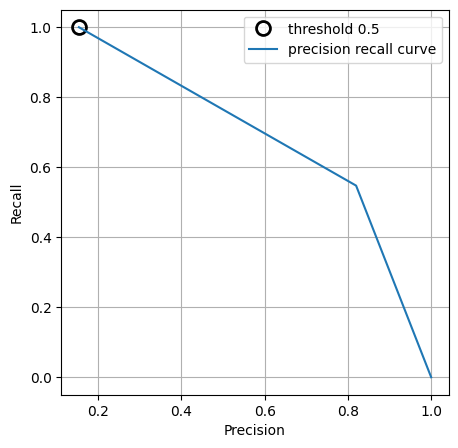

In [57]:
# Now, let's run the ROC curve to evaluate our model's performance:
from sklearn.metrics import precision_recall_curve

%matplotlib inline
plt.subplots(figsize = (5,5))
precision, recall, thresholds = precision_recall_curve(Y_val, y_pred)

# default threshold
close_zero = np.argmin(np.abs(thresholds - 0.5))

plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="threshold 0.5", fillstyle="none", c='k', mew=2)

plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")
plt.grid()

We are positive that the ROC curve is greater than 0.5 >> which is a good sign!! 

In [58]:
#Model 3: Bagging Classifier Model

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

base_estimator = DecisionTreeClassifier(random_state= 42 )
BaggingClass_Model = BaggingClassifier( base_estimator, random_state= 42 )

BaggingClass_Model.fit(X_train_scaled, Y_train)

#Model Fitting Analysis
print('Train_score: ', BaggingClass_Model.score(X_train_scaled, Y_train))
print('Test_score: ', BaggingClass_Model.score(X_val_scaled, Y_val))

#Trying to understand the overall accuracy of the model
y_pred = RandForest_Model.predict(X_val_scaled)
#print("Predicted values :", y_pred)
#print("Actual values :", Y_val.values)

#Checking the accuracy of the model:
result = accuracy_score(y_pred, Y_val)
error = 1 - (result)
print(" Accuracy for this model =" , result*100) 
print(" Error for this model =" , error*100)

Train_score:  0.9911603760347972
Test_score:  0.8916947250280584
 Accuracy for this model = 91.18967452300785
 Error for this model = 8.810325476992142


BaggingClass_Model == Overfitting ==> train score = 99% [not the ideal condition] . But, the over prediction accuracy of the model seems to be good = 91% with an error of just 8.8% 

So to rectify this situation, I'm going to tune my model with hyper-parameters specifications to get a good/optimal fit >> much similar to RandomForest 

In [59]:
train_score = []
test_score = []
index = []

for max_depth in [1, 2, 3]:
    for n_estimators in [70,100, 200, 300, 500]:
        for max_samples in [0.05, 0.1, 0.2]:
            for max_features in [0.05, 0.1, 0.15, 0.2]:
                base_estimator = DecisionTreeClassifier(max_depth= max_depth, 
                                                        random_state= 42)
                BaggingClass_Model = BaggingClassifier(base_estimator,
                                n_estimators= n_estimators,
                                max_samples= max_samples,
                                max_features= max_features,
                                random_state= 0)

                BaggingClass_Model.fit(X_train_scaled, Y_train)
                train_score.append(BaggingClass_Model.score(X_train_scaled, Y_train))
                test_score.append(BaggingClass_Model.score(X_val_scaled, Y_val))
                index.append((max_depth, n_estimators, max_samples, max_features))

In [60]:
# Now my best paramters based of the range provided for a good fitting model are as follows: 
index[np.argmax(np.array(test))]

(3, 70, 0.1, 0.2)

In [61]:
#Hence initializing my model with the best hyper-parameters:

#Defining my model
base_estimator = DecisionTreeClassifier(random_state= 42, max_depth= 3 )
BaggingClass_Model = BaggingClassifier(base_estimator,
                                n_estimators= 70,
                                max_samples= 0.1,
                                max_features= 0.2,
                                random_state= 42)
#Fitting my model
BaggingClass_Model.fit(X_train_scaled, Y_train)

#Testing the fitting score for my model post tuning the model:
print('Train score: ', BaggingClass_Model.score(X_train_scaled, Y_train))
print('Test score: ', BaggingClass_Model.score(X_val_scaled, Y_val))

Train score:  0.8470604742528413
Test score:  0.8462401795735129


Again, GREAT NEWS - My model's now a Good Fit. However, I see the accuracy has gone down to a 84% 

Also, note >> The classifier has a tendency of changing the outputs a little each time it's run 
* Initally my max depth was 2
* Then it changed to 1  -- however, the model fitting doesn't seem to change - so i'm going with the same one.

Testing the over all accuracy now:  

In [62]:
#Trying to predict along with it's accuracy factor 
y_pred = BaggingClass_Model.predict(X_val_scaled)
#print("Predicted values :", y_pred)
#print("Actual values :", Y_val.values)

#checking the accuracy of the model:
result = accuracy_score(y_pred, Y_val)
error = 1 - (result)
print(" Accuracy for this model =" , result*100) 
print(" Error for this model =" , error*100)

 Accuracy for this model = 84.6240179573513
 Error for this model = 15.375982042648706


Bagging Classifier Model, post tuning gives me an accuracy of just 84% and an error of wrong predictions of 15%. == Not the Best Model

In [63]:
#Model 4: Logestic Classifier Model:

#Defining my model
LogReg_Model = LogisticRegression(multi_class="multinomial",random_state = 42)
LogReg_Model.fit(X_train_scaled, Y_train)

#Testing the fitting score for my model:
print('Train score: ', LogReg_Model.score(X_train_scaled, Y_train))
print('Test score: ', LogReg_Model.score(X_val_scaled, Y_val))

#Trying to predict along with it's accuracy factor 
y_pred = LogReg_Model.predict(X_val_scaled)
#print("Predicted values :", y_pred)
#print("Actual values :", Y_val.values)

#checking the accuracy of the model:
result = accuracy_score(y_pred, Y_val)
error = 1 - (result)
print(" Accuracy for this model =" , result*100) 
print(" Error for this model =" , error*100)

Train score:  0.8808755437070296
Test score:  0.8731762065095399
 Accuracy for this model = 87.31762065095398
 Error for this model = 12.682379349046013


LogisticRegression Model even without tuning is a Good Fit with an accuracy of 87% and error of wrong predictions of 12%. == Not the Best Model

# MODEL CHOOSING :

The best model among all four models will be : Model 2 - the Random Forest Classifer. Hence we will use the same model for predicting our future Revenue values.

Revenue Prediction based of the choose model of our test(future) data

In [64]:
Reven_Pred = RandForest_Model.predict(Test_data_scaled)
Reven_Pred

array([0, 0, 0, ..., 1, 0, 0])

In [65]:
Reven_Pred_prob = RandForest_Model.predict_proba(Test_data_scaled)
Reven_Pred_prob

array([[6.69022485e-01, 3.30977515e-01],
       [9.93229947e-01, 6.77005255e-03],
       [6.24757175e-01, 3.75242825e-01],
       ...,
       [4.64244591e-01, 5.35755409e-01],
       [9.99560188e-01, 4.39811974e-04],
       [9.58311949e-01, 4.16880511e-02]])

In [67]:
# Convert numpy to dataframe.
Test_data_Pred = scaler.inverse_transform(Test_data_scaled)
df_Test_data_Pred = pd.DataFrame(Test_data_Pred, columns = df_test_encoded.columns)
df_Test_data_Pred['Predicted Revenue'] = Reven_Pred 


In [ ]:
#df_Test_data_Pred.head()
df_Test_data_Pred['Predicted Revenue'].value_counts()

In [ ]:
df_Test_data_Pred.info()
df_Test_data_Pred.describe()